In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [114]:
df = pd.read_csv("data.csv", index_col='DATE', parse_dates=True)
df = df.loc['1970':'1989']

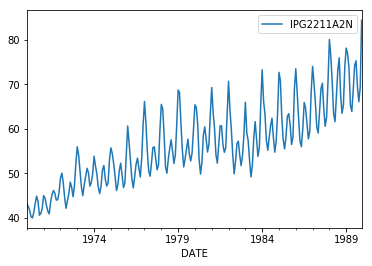

In [115]:
df.plot()
df.head()
plt.show()

In [116]:
df.head()

,IPG2211A2N
DATE,
1970-01-01,43.0869
1970-02-01,42.5578
1970-03-01,41.6215
1970-04-01,40.1982
1970-05-01,39.9321


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 240 entries, 1970-01-01 to 1989-12-01
Data columns (total 1 columns):
IPG2211A2N    240 non-null float64
dtypes: float64(1)
memory usage: 3.8 KB


In [118]:
df.describe()

,IPG2211A2N
count,240.000000
mean,56.502202
std,9.043580
min,39.932100
25%,49.799025
50%,55.607250
75%,62.656200
max,84.404000


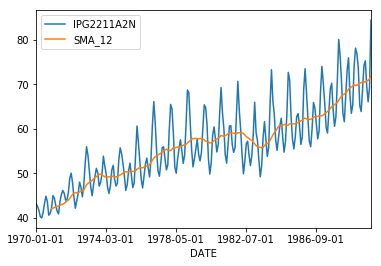

In [79]:
df = pd.read_csv("data.csv", index_col='DATE')
df = df.loc['1970':'198912']
for i in range(0,df.shape[0]-11):
    local_sum = 0
    for j in range(12):
        local_sum += df.iloc[i+j,0]
    df.loc[df.index[i+11],'SMA_12'] = np.round((local_sum/12),1)
df.plot()
plt.show()

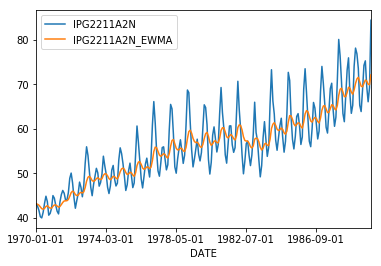

In [80]:
df = pd.read_csv("data.csv", index_col='DATE')
df = df.loc['1970':'198912']
df.join(df.ewm(span=12, adjust=False).mean(), rsuffix='_EWMA').plot()
plt.show()

c:\users\tsar\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
c:\users\tsar\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
c:\users\tsar\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


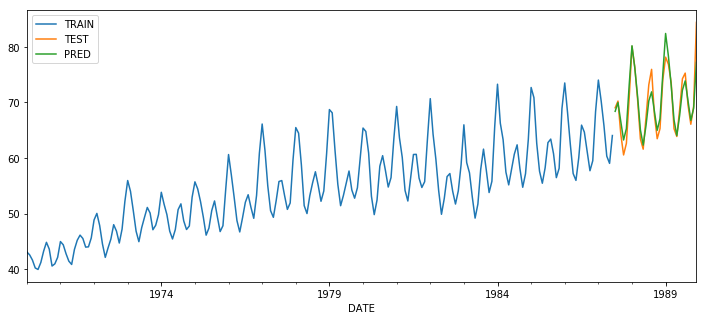

In [121]:
df = pd.read_csv("data.csv", index_col='DATE', parse_dates=True)
df = df.loc['1970':'1989']
df.index.freq='MS'

train, test = df.iloc[:210], df.iloc[210:]
fitted = ExponentialSmoothing(train["IPG2211A2N"]
                              , trend='mul'
                              , seasonal='mul'
                              , seasonal_periods=12
                             ).fit()
pred = fitted.forecast(30)
train["IPG2211A2N"].plot(legend=True, label="TRAIN", figsize=(12,5))
test["IPG2211A2N"].plot(legend=True, label="TEST")
pred.plot(legend=True, label="PRED")
plt.show()